<a href="https://colab.research.google.com/github/DarshanGowda0/MusicalInstrumentsClassification/blob/main/data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################
#########VIET NGUYEN##########
#####CS 6140 - SPRING 2021####
#####PROJECT CODING ##########
#####DATA EXPLORATION#########
##############################

In [ ]:
#!pip install librosa
#!pip install seaborn --upgrade

In [ ]:
import pandas as pd
import numpy as np
import librosa, librosa.display
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/CS6140 ML Group Project/Dataset/Xiaoyu/6-instruments-20-mfcc-26-features-mean.csv')
df6

Unnamed: 0  chroma_stft_mean  rms_mean  ...  mfcc19_mean  mfcc20_mean  label
0              0          0.192422  0.165918  ...    -0.144694    -6.089864    pia
1              1          0.391211  0.016077  ...    -5.644500     0.791493    gac
2              2          0.323357  0.137313  ...    -7.101434     5.433277    voi
3              3          0.178228  0.068478  ...   -11.116922     3.116793    flu
4              4          0.323457  0.102491  ...    -7.015008     2.941664    org
...          ...               ...       ...  ...          ...          ...    ...
3841        3841          0.325952  0.196429  ...   -14.095682    -2.414496    voi
3842        3842          0.300576  0.246258  ...   -14.046912   -10.431435    voi
3843        3843          0.329922  0.086164  ...    -8.355453    -2.506455    voi
3844        3844          0.263420  0.087807  ...    -7.716689     4.580624    voi
3845        3845          0.343065  0.086601  ...    -8.887377    -0.398892    voi

[3846 rows x 28 columns]

In [ ]:
np.unique(df6['label'])

array(['flu', 'gac', 'org', 'pia', 'tru', 'voi'], dtype=object)

In [ ]:
# Getting features data
df = pd.read_csv('/content/drive/MyDrive/CS6140 ML Group Project/Dataset/Xiaoyu/11-instruments-20-mfcc-26-features-mean.csv')
df = df.iloc[:,1:]
df.head()

chroma_stft_mean  rms_mean  ...  mfcc20_mean  label
0          0.192422  0.165918  ...    -6.089864    pia
1          0.323357  0.137313  ...     5.433277    voi
2          0.284956  0.086779  ...     5.508985    tru
3          0.302087  0.047356  ...     1.938222    vio
4          0.178228  0.068478  ...     3.116793    flu

[5 rows x 27 columns]

## MFCC Visualization for 11 classes using PCA for dimensionality reduction

In [ ]:
filtered_mfcc = df[[col for col in df if col.startswith('mfcc')]]

In [ ]:
filtered_mfcc6 = df6[[col for col in df6 if col.startswith('mfcc')]]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(filtered_mfcc)
pca.explained_variance_ratio_
df_pca = pd.DataFrame(df_pca)
df_pca['label'] = df['label']
df_pca.columns = ['PCA1', 'PCA2', 'label']
df_pca

PCA1       PCA2 label
0     -82.312072  18.790330   pia
1     -97.459363  23.870971   voi
2      95.890689 -77.573387   tru
3      27.462817 -17.780753   vio
4     124.584433  19.946384   flu
...          ...        ...   ...
6700 -122.572367 -73.493426   gel
6701  -92.473648 -68.522770   gel
6702 -176.870749   0.757237   gel
6703 -203.062309  16.975521   gel
6704 -167.867661  10.953309   gel

[6705 rows x 3 columns]

In [ ]:
from sklearn.decomposition import PCA

pca6 = PCA(n_components = 2)
df_pca6 = pca.fit_transform(filtered_mfcc6)
pca.explained_variance_ratio_
df_pca6 = pd.DataFrame(df_pca6)
df_pca6['label'] = df6['label']
df_pca6.columns = ['PCA1', 'PCA2', 'label']
df_pca6

PCA1       PCA2 label
0     -82.518563  -0.228573   pia
1     201.606573  29.765780   gac
2     -96.440148  18.006113   voi
3     126.393576  24.373210   flu
4     -43.344972 -17.554024   org
...          ...        ...   ...
3841  -89.759363 -38.715115   voi
3842  -93.395111 -37.168972   voi
3843  -13.223758  14.461575   voi
3844    7.356455  14.110371   voi
3845   -8.350789   7.616581   voi

[3846 rows x 3 columns]

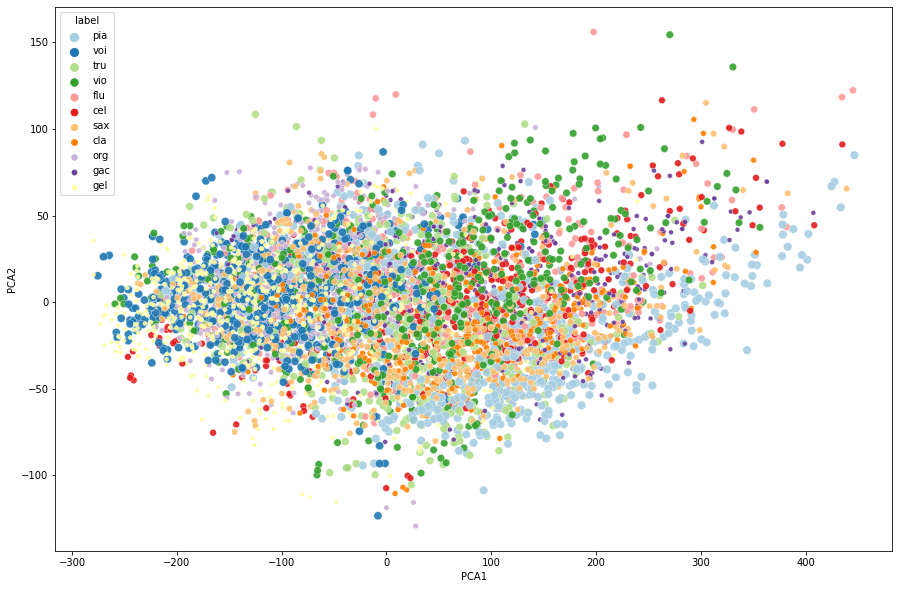

In [ ]:
sns.scatterplot(data = df_pca, x = "PCA1", y = "PCA2", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.9)
plt.show()

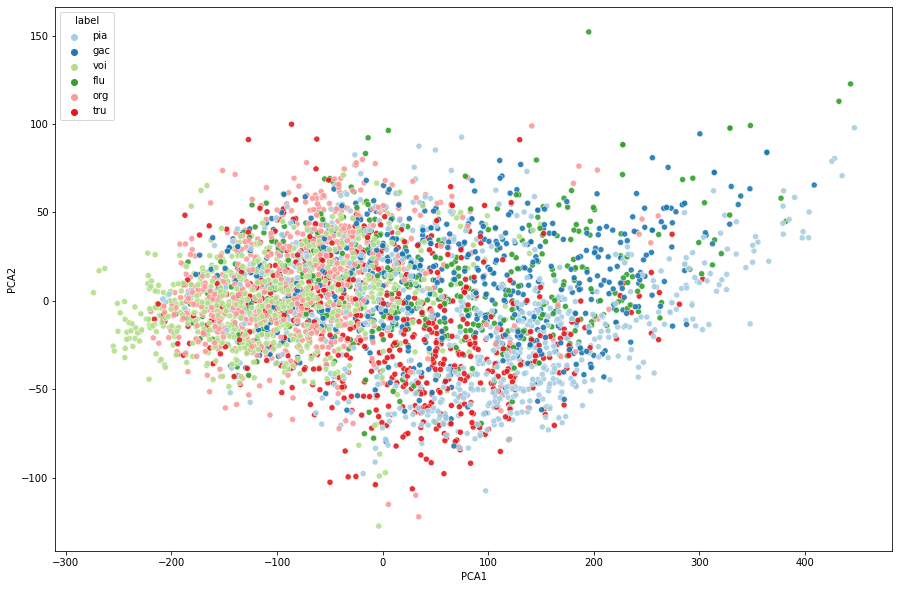

In [ ]:
sns.scatterplot(data = df_pca6, x = "PCA1", y = "PCA2", 
                hue = "label",
               palette = 'Paired', alpha = 0.9)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
df_tsne = tsne.fit_transform(filtered_mfcc)

In [ ]:
tsne6 = TSNE()
df_tsne6 = tsne.fit_transform(filtered_mfcc6)

In [ ]:
df_tsne = pd.DataFrame(df_tsne)
df_tsne.columns = ["tsne-2d-one", "tsne-2d-two"]
df_tsne['label'] = df['label']

In [ ]:
df_tsne6 = pd.DataFrame(df_tsne6)
df_tsne6.columns = ["tsne-2d-one", "tsne-2d-two"]
df_tsne6['label'] = df6['label']

In [ ]:
df_tsne

tsne-2d-one  tsne-2d-two label
0       18.172037   -24.312641   pia
1       20.852705   -58.470814   voi
2        4.806218    48.696114   tru
3      -15.391104     1.673877   vio
4      -33.440125    35.024265   flu
...           ...          ...   ...
6700    44.392788     0.346916   gel
6701    20.635027   -10.969056   gel
6702    74.949043   -29.604660   gel
6703    85.288757    11.379515   gel
6704    74.815163   -29.711813   gel

[6705 rows x 3 columns]

In [ ]:
df_tsne6

tsne-2d-one  tsne-2d-two label
0       25.771736   -23.089821   pia
1      -80.361443     2.262914   gac
2       46.501987   -23.946424   voi
3      -62.192047     2.366819   flu
4        9.598865   -11.999155   org
...           ...          ...   ...
3841    30.363953    24.596804   voi
3842    30.363026    24.595203   voi
3843    -4.033760   -20.741570   voi
3844   -21.800236   -27.142988   voi
3845    -4.163690   -20.603058   voi

[3846 rows x 3 columns]

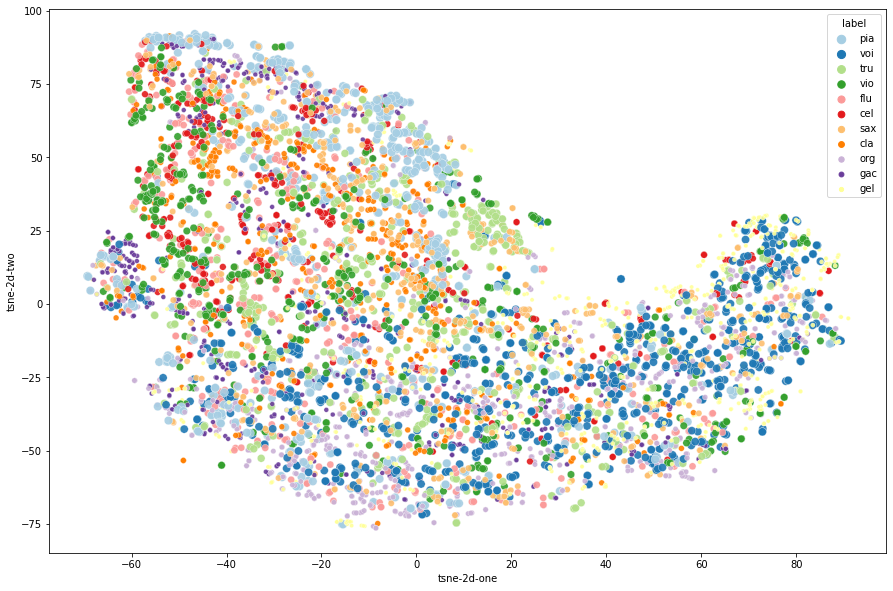

In [ ]:
sns.scatterplot(data = df_tsne, x = "tsne-2d-one", y = "tsne-2d-two", 
                hue = "label", size = 'label',
               palette = 'Paired', alpha = 0.9)
plt.show()

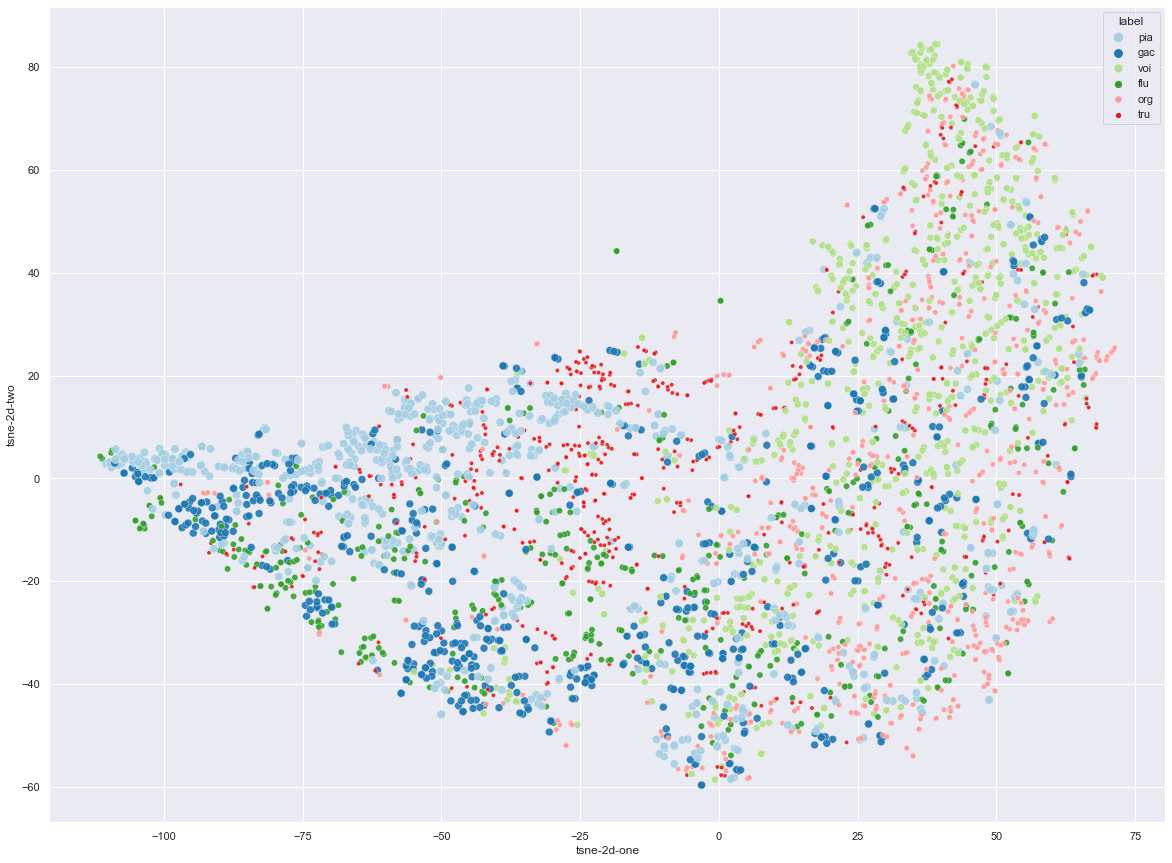

In [ ]:
sns.scatterplot(data = df_tsne6, x = "tsne-2d-one", y = "tsne-2d-two", 
                hue = "label", size = 'label',
               palette = 'Paired', alpha = 0.9)
plt.show()

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = pd.DataFrame(scaler.fit_transform(df[['spectral_centroid_mean', 'zero_crossing_rate_mean']]))
training_features['label'] = df_2['label']
training_features.columns = ['zero_cross_rate', 'spectral_centroid', 'label']
training_features

zero_cross_rate  spectral_centroid label
0            0.034737           0.041016   cel
1           -0.110754          -0.423142   cel
2           -0.765377          -0.717744   cel
3           -0.495414          -0.636934   cel
4           -0.612014          -0.607790   cel
...               ...                ...   ...
6700        -0.552965          -0.721736   NaN
6701        -0.466642          -0.533165   NaN
6702        -0.032211          -0.222480   NaN
6703         0.139854          -0.093535   NaN
6704        -0.007000          -0.093743   NaN

[6705 rows x 3 columns]

In [ ]:
scaler6 = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features6 = pd.DataFrame(scaler6.fit_transform(df6[['spectral_centroid_mean', 'zero_crossing_rate_mean']]))
training_features6['label'] = df6['label']
training_features6.columns = ['zero_cross_rate', 'spectral_centroid', 'label']
training_features6

zero_cross_rate  spectral_centroid label
0            0.034737           0.041016   pia
1           -0.649590          -0.890116   gac
2           -0.110754          -0.423142   voi
3           -0.612014          -0.607790   flu
4           -0.465883          -0.669678   org
...               ...                ...   ...
3841        -0.561474          -0.774601   voi
3842        -0.561788          -0.765279   voi
3843        -0.407445          -0.745965   voi
3844        -0.510512          -0.826336   voi
3845        -0.454320          -0.770932   voi

[3846 rows x 3 columns]

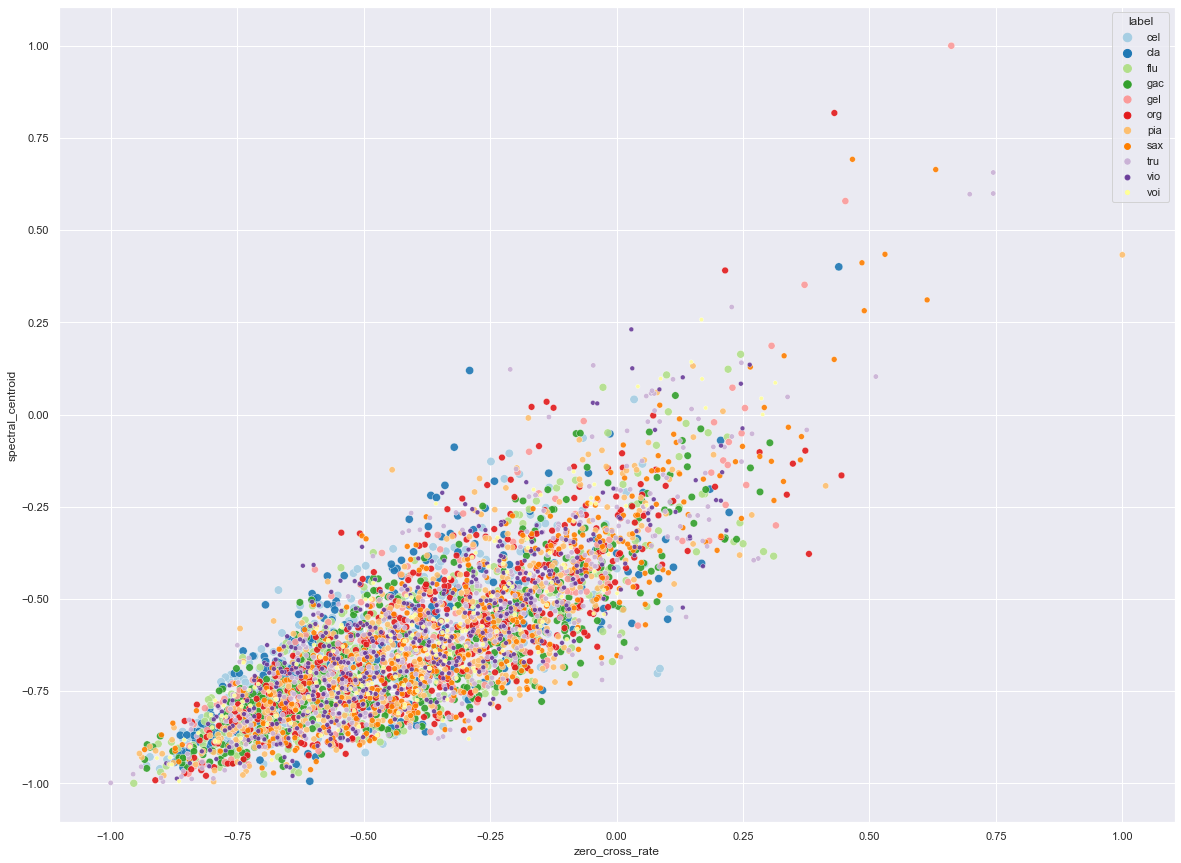

In [ ]:
sns.scatterplot(data = training_features, x = "zero_cross_rate", y = "spectral_centroid", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.9)
plt.show()

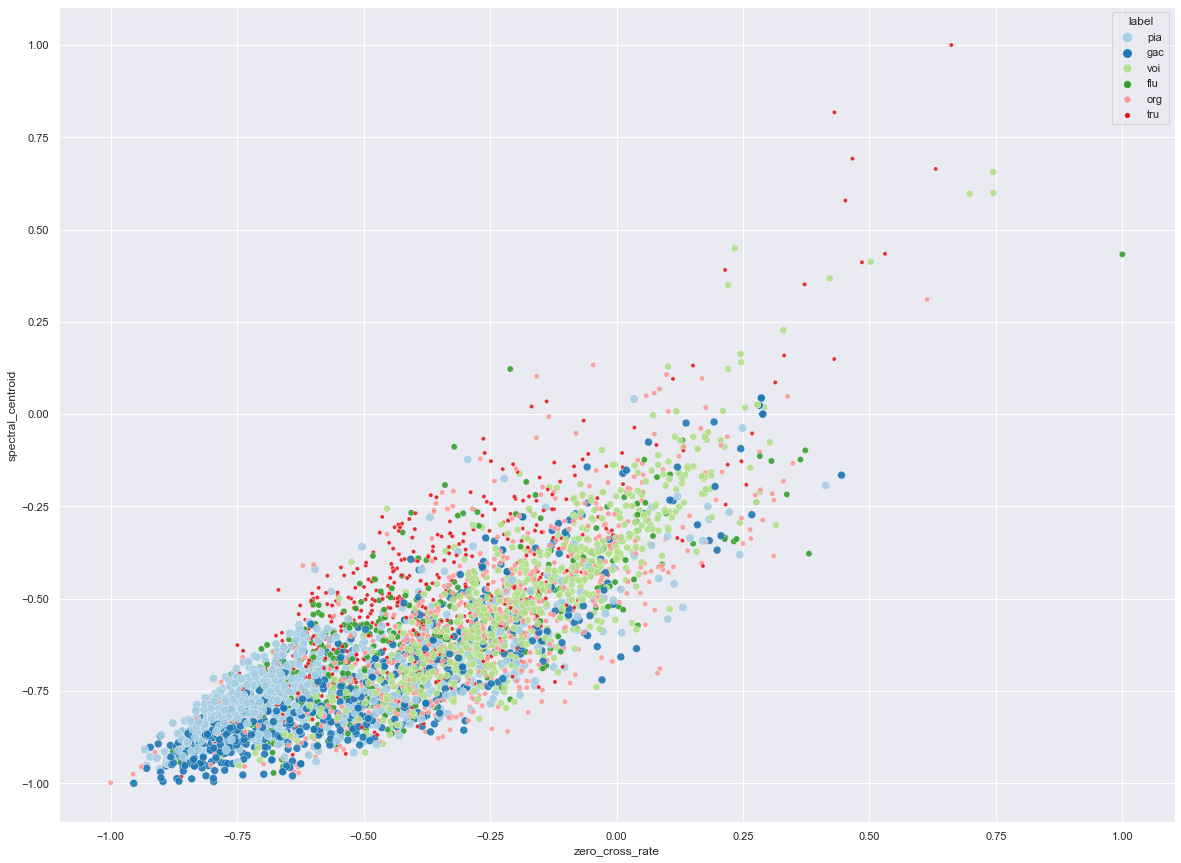

In [ ]:
sns.scatterplot(data = training_features6, x = "zero_cross_rate", y = "spectral_centroid", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.9)
plt.show()

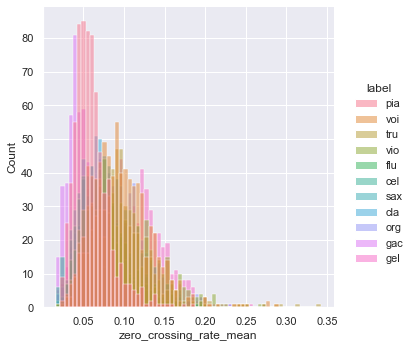

In [ ]:
sns.displot(df, x = "zero_crossing_rate_mean", hue = "label")
plt.show()

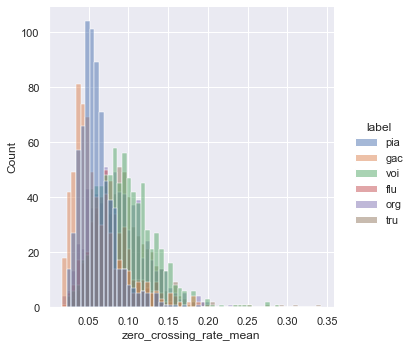

In [ ]:
sns.displot(df6, x = "zero_crossing_rate_mean", hue = "label")
plt.show()

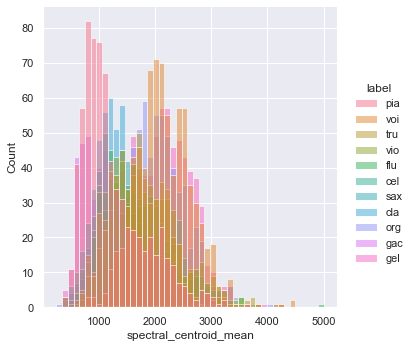

In [ ]:
sns.displot(df, x = "spectral_centroid_mean", hue = "label")
plt.show()

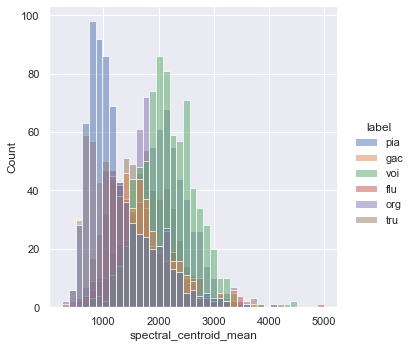

In [ ]:
sns.displot(df6, x = "spectral_centroid_mean", hue = "label")
plt.show()

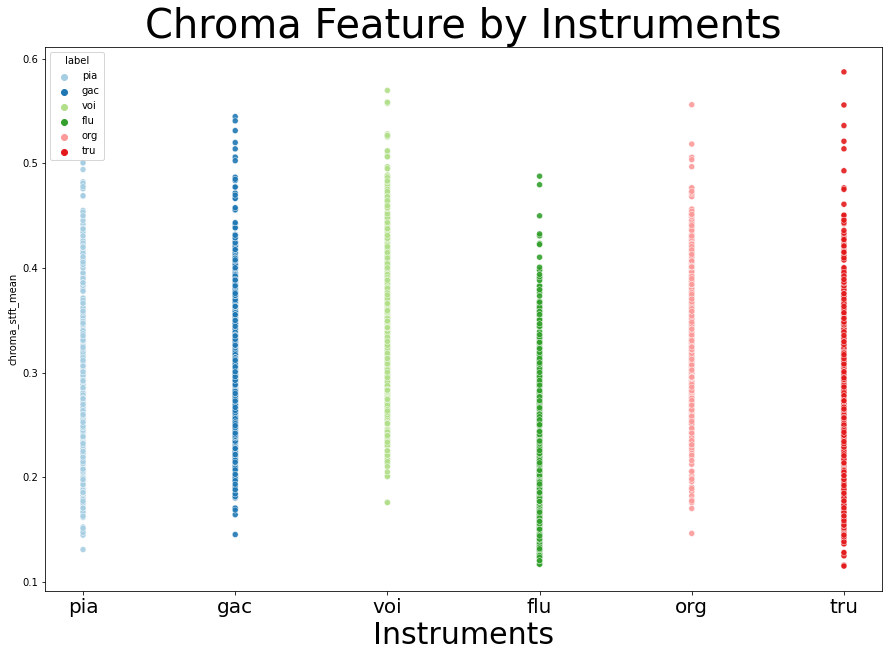

In [ ]:
sns.scatterplot(data = df6, x = 'label' , y = 'chroma_stft_mean', 
                hue = "label", palette = 'Paired', alpha = 0.9)
plt.title("Chroma Feature by Instruments", size = 40)
plt.xlabel("Instruments", size = 30)
plt.xticks(fontsize = 20)
plt.show()

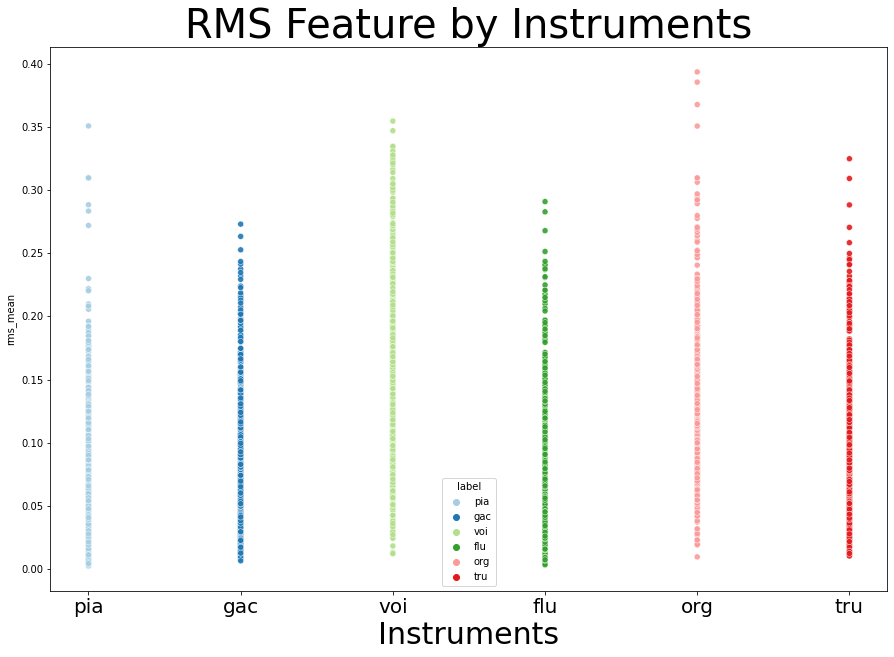

In [ ]:
sns.scatterplot(data = df6, x = 'label' , y = 'rms_mean', 
                hue = "label", palette = 'Paired', alpha = 0.9)
plt.title("RMS Feature by Instruments", size = 40)
plt.xlabel("Instruments", size = 30)
plt.xticks(fontsize = 20)
plt.show()

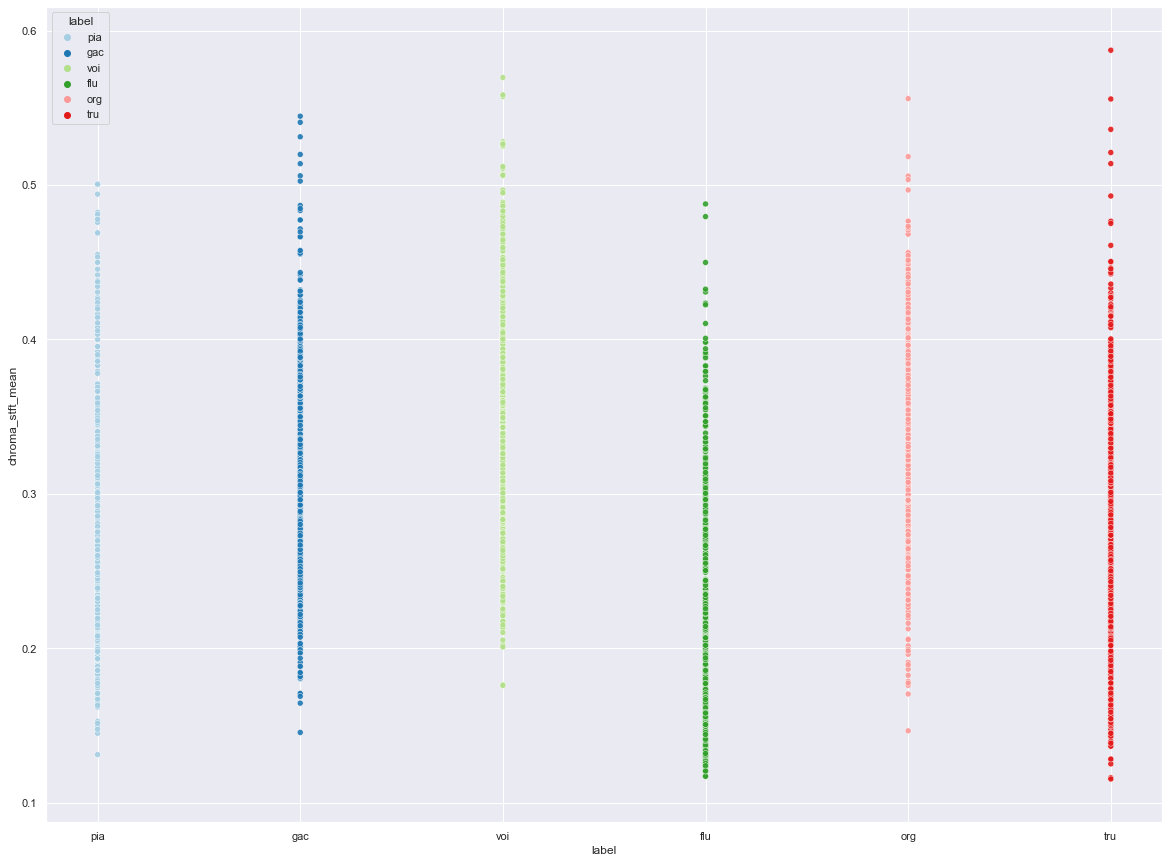

In [ ]:
sns.scatterplot(data = df6, x = 'label' , y = 'chroma_stft_mean', 
                hue = "label", palette = 'Paired', alpha = 0.9)
plt.show()

So we can see there's definitely a difference across our instruments when comparing the Chroma mean. Gel as the highest while flu has the lowest.

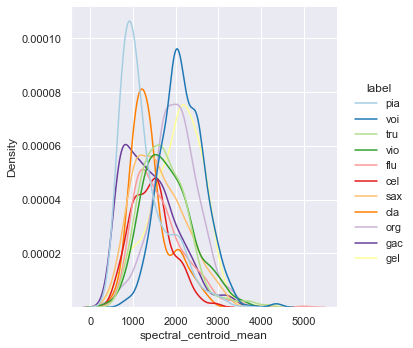

In [ ]:
sns.displot(df, x = "spectral_centroid_mean", kind = "kde", bw_adjust = .95, 
            hue = 'label', palette = 'Paired')
plt.show()

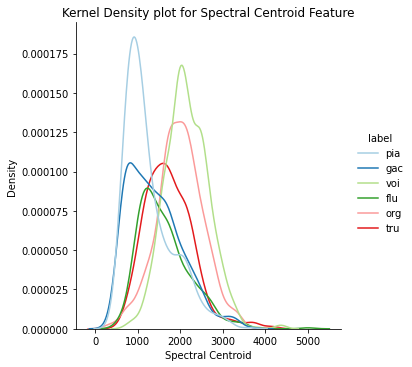

In [ ]:
sns.displot(df6, x = "spectral_centroid_mean", kind = "kde", bw_adjust = .95, 
            hue = 'label', palette = 'Paired')
plt.title("Kernel Density plot for Spectral Centroid Feature")
plt.xlabel("Spectral Centroid")
plt.show()

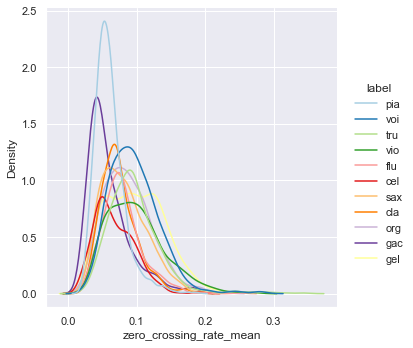

In [ ]:
sns.displot(df, x = "zero_crossing_rate_mean", kind = "kde", bw_adjust = .95, 
            hue = 'label', palette = 'Paired')
plt.show()

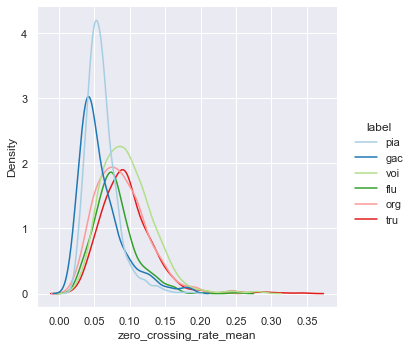

In [ ]:
sns.displot(df6, x = "zero_crossing_rate_mean", kind = "kde", bw_adjust = .95, 
            hue = 'label', palette = 'Paired')
plt.show()

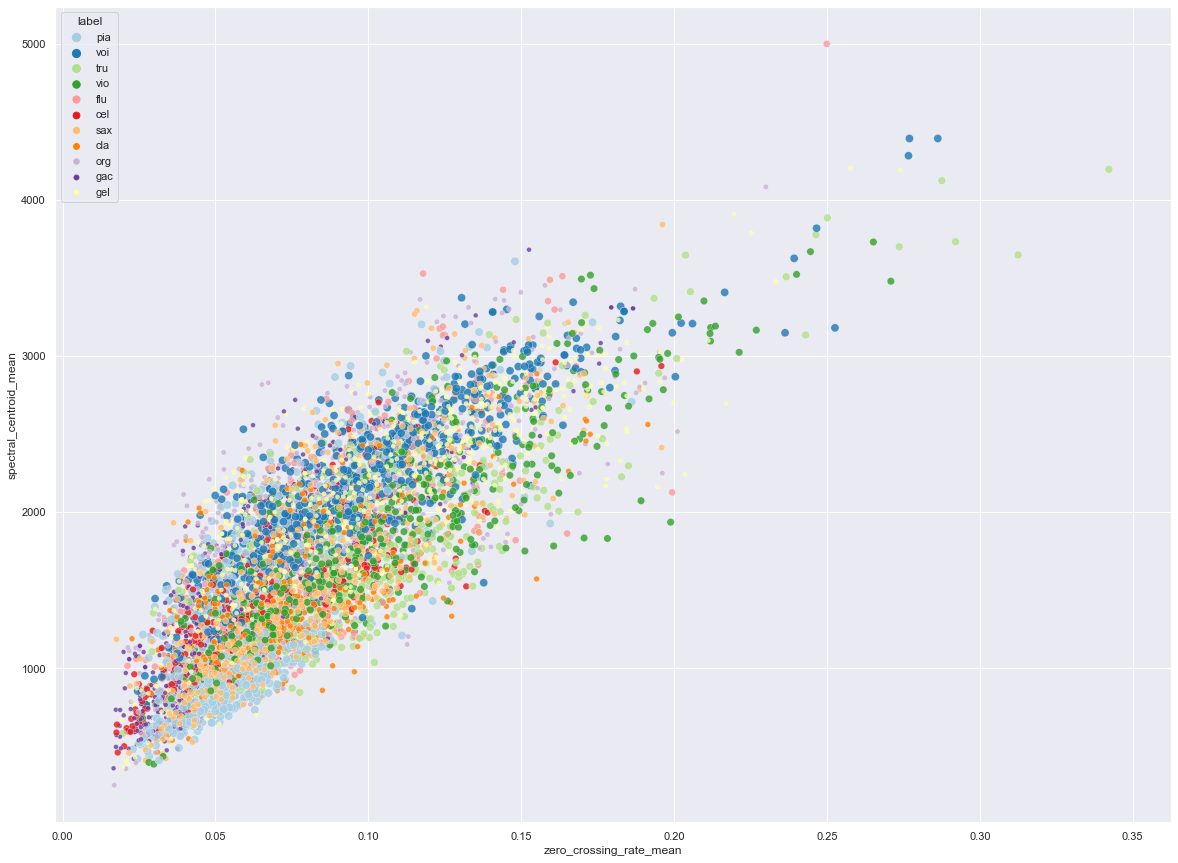

In [ ]:
sns.scatterplot(data = df, x = "zero_crossing_rate_mean", y = "spectral_centroid_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()

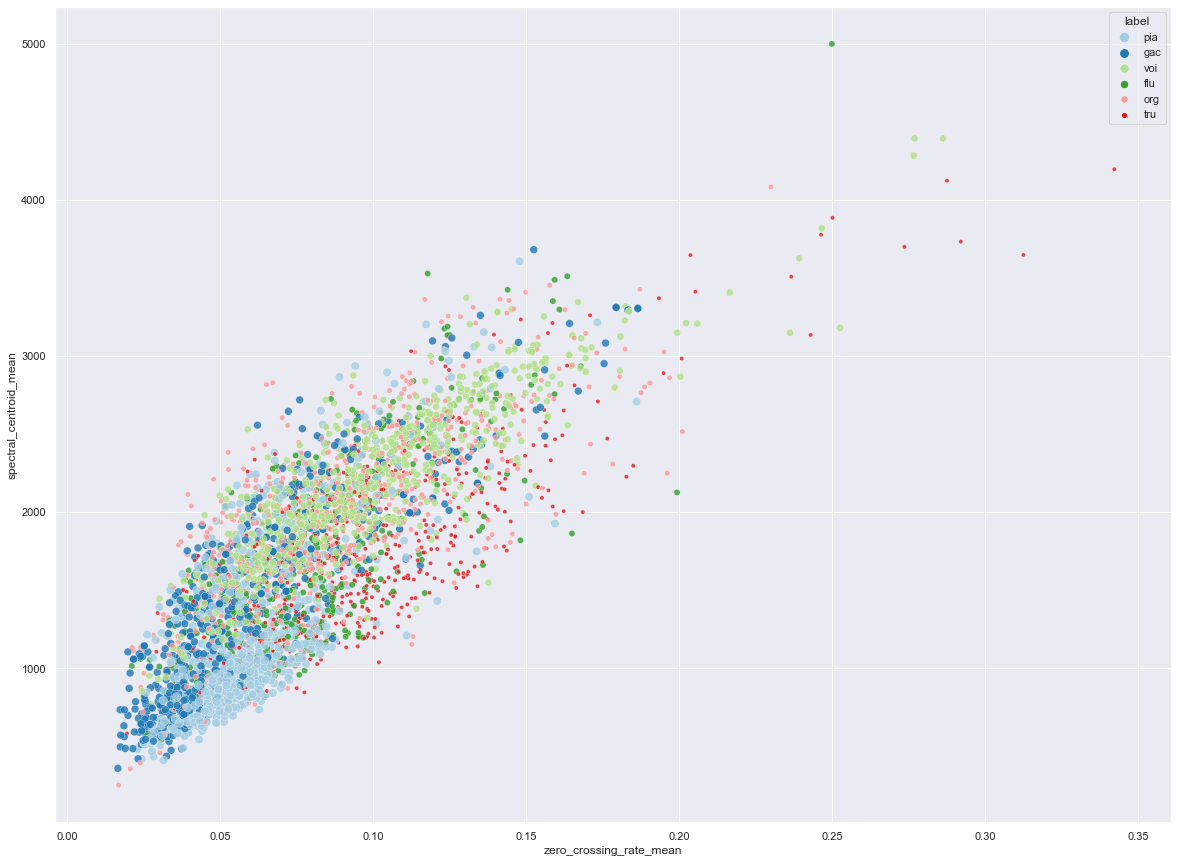

In [ ]:
sns.scatterplot(data = df6, x = "zero_crossing_rate_mean", y = "spectral_centroid_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()

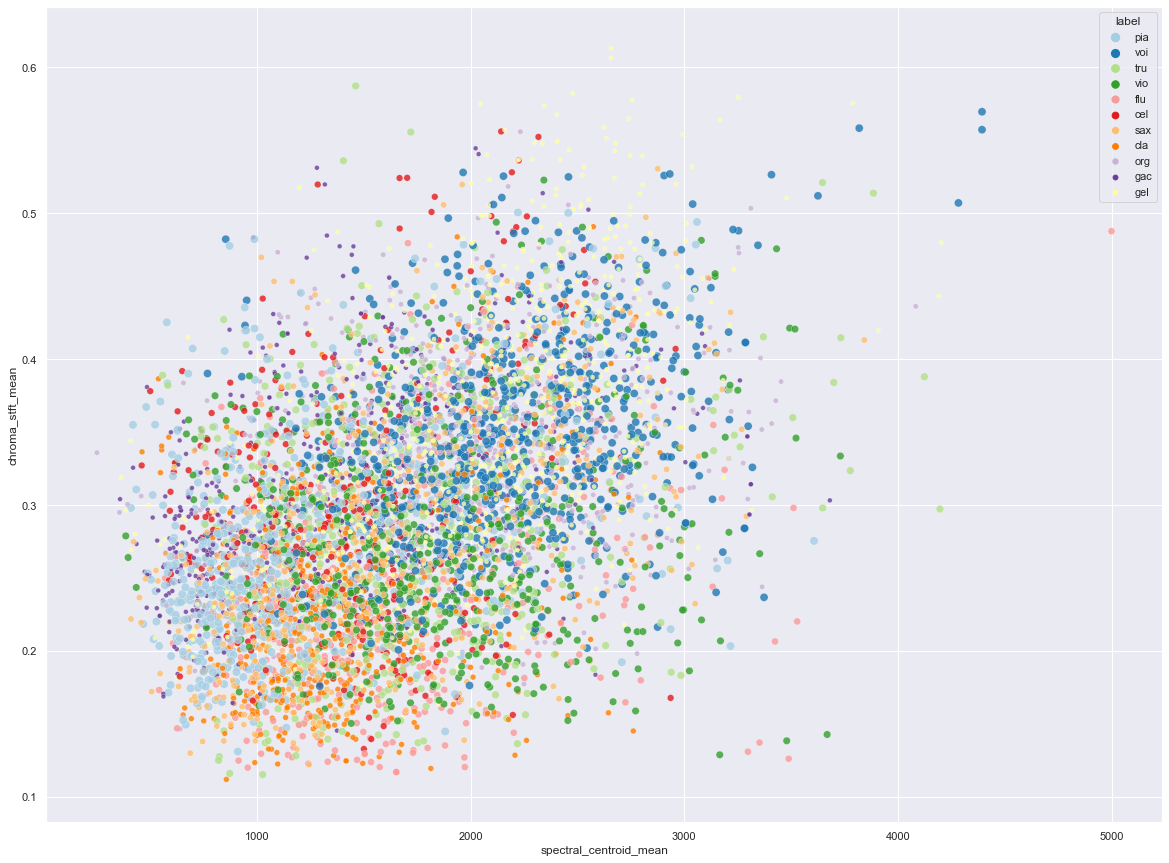

In [ ]:
sns.scatterplot(data = df, y = "chroma_stft_mean", x = "spectral_centroid_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()

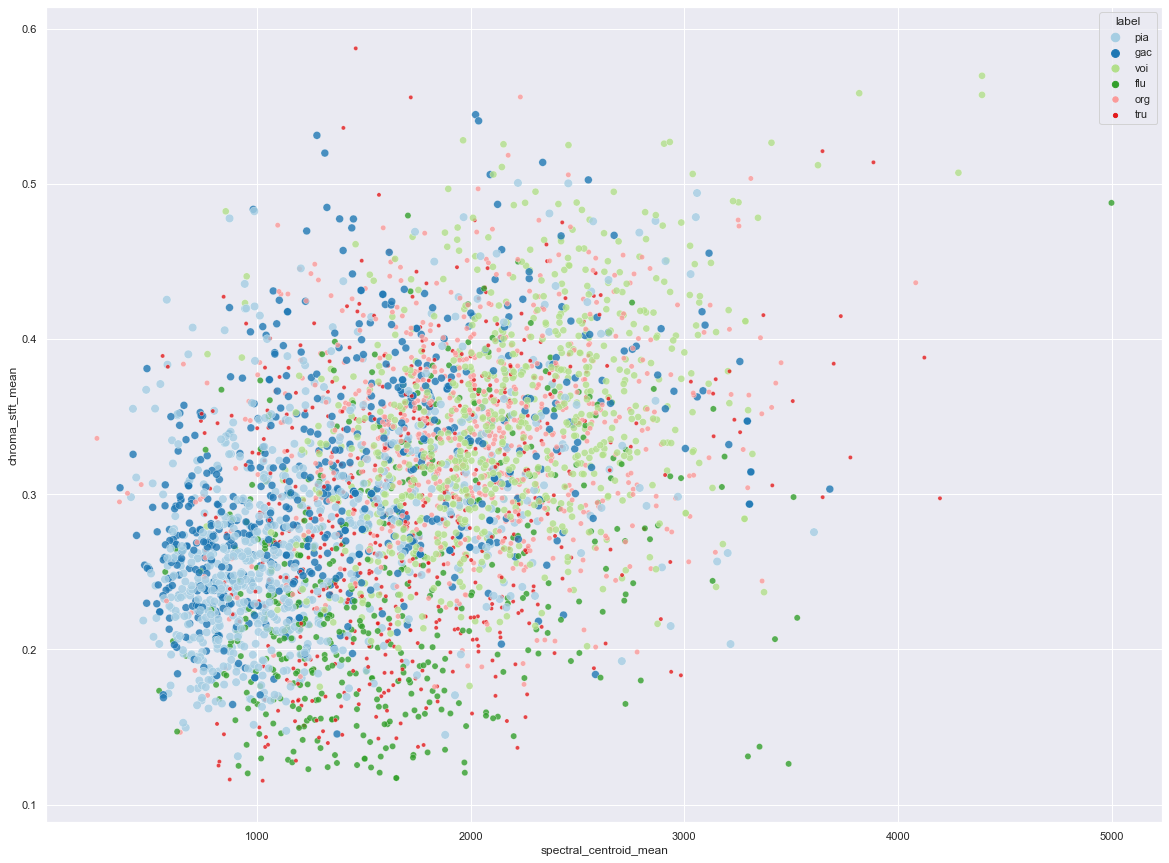

In [ ]:
sns.scatterplot(data = df6, y = "chroma_stft_mean", x = "spectral_centroid_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()

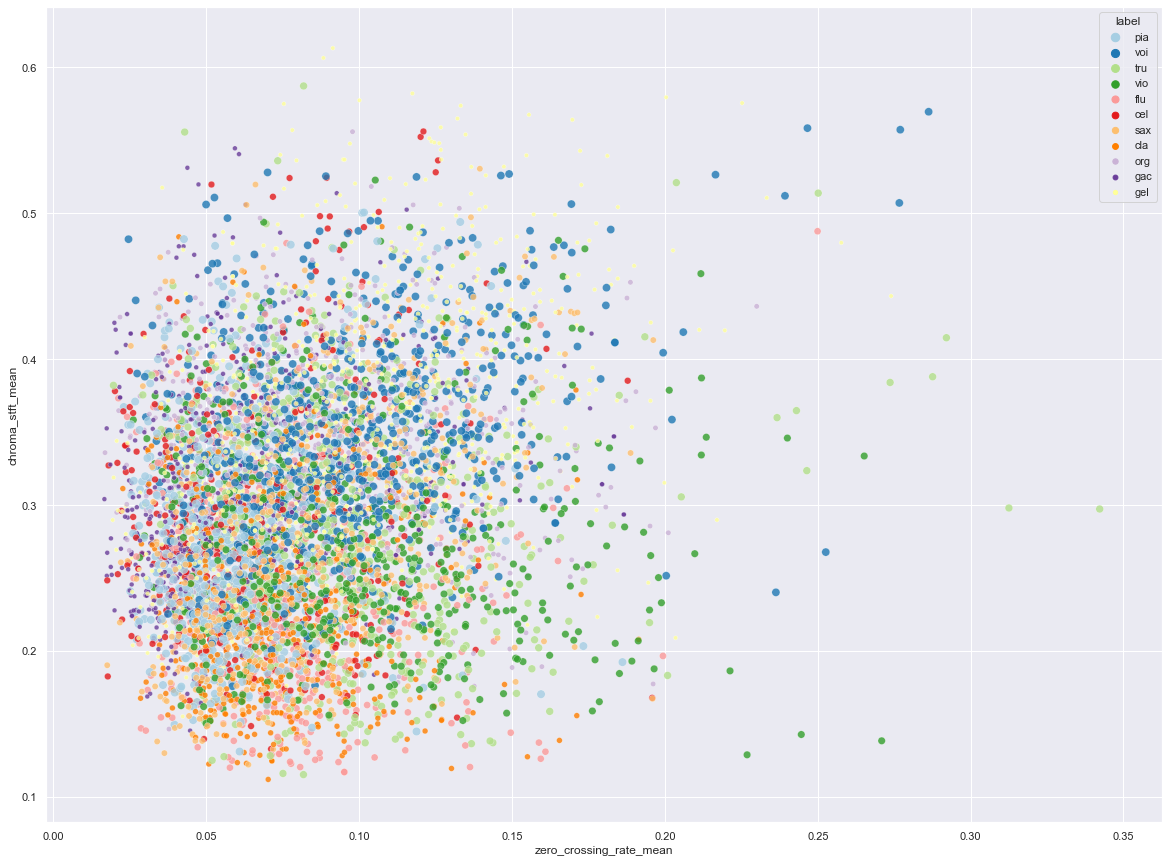

In [ ]:
sns.scatterplot(data = df, y = "chroma_stft_mean", x = "zero_crossing_rate_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()

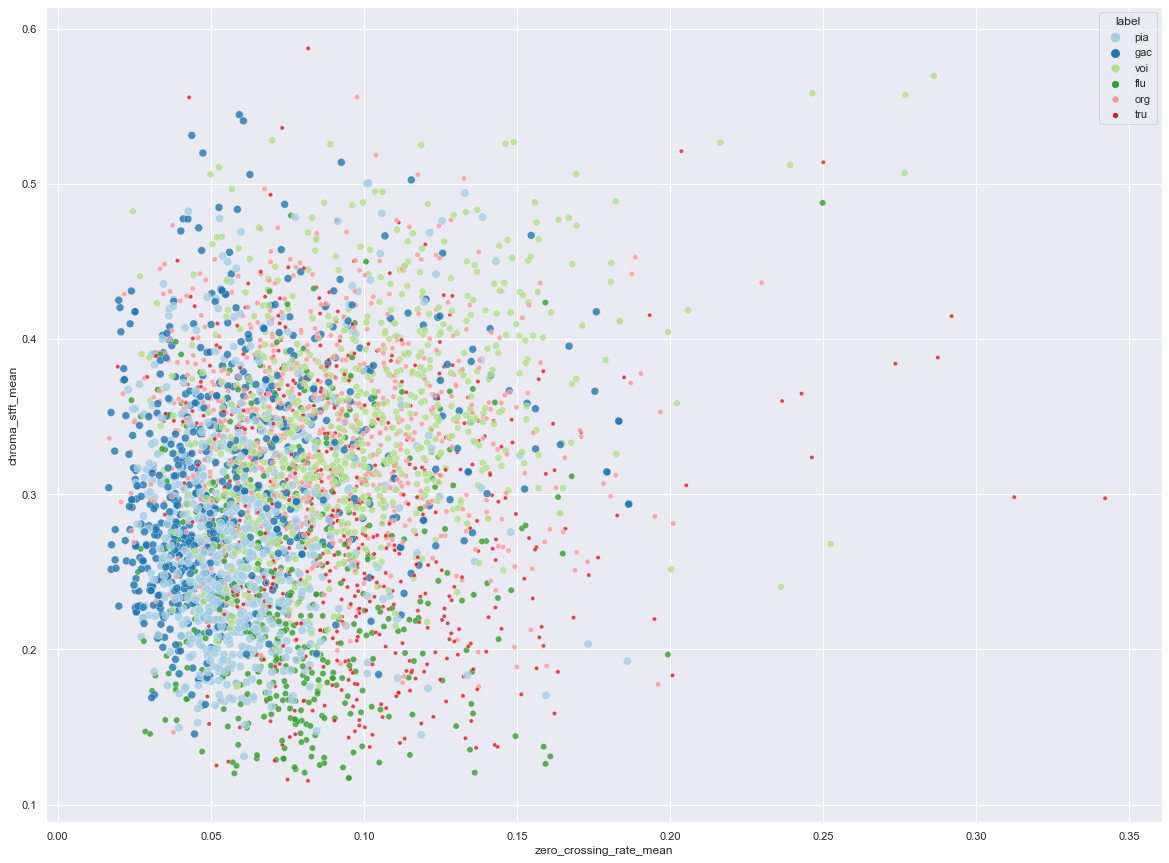

In [ ]:
sns.scatterplot(data = df6, y = "chroma_stft_mean", x = "zero_crossing_rate_mean", 
                hue = "label", size = 'label', markers = 'label',
               palette = 'Paired', alpha = 0.8)
plt.show()